In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
%matplotlib inline

In [2]:
train=pd.read_csv('titanic/train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### DATA CLEANING AND PRE PROCESSING 

<Axes: >

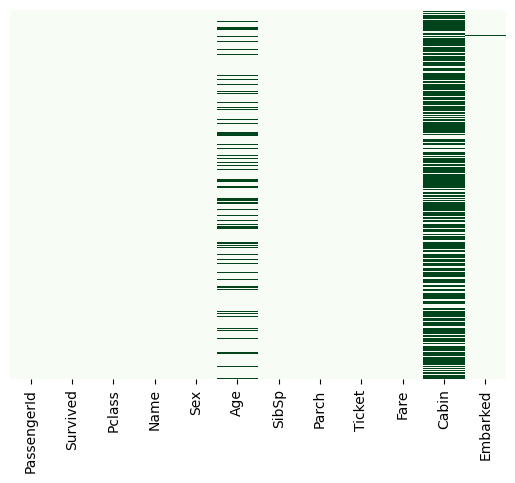

In [3]:
sn.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="Greens")

<Axes: xlabel='Survived', ylabel='count'>

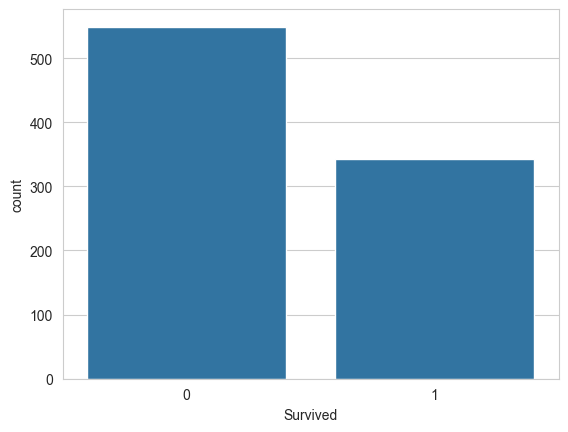

In [4]:
sn.set_style('whitegrid')
sn.countplot(x='Survived',data=train)

<Axes: xlabel='Survived', ylabel='count'>

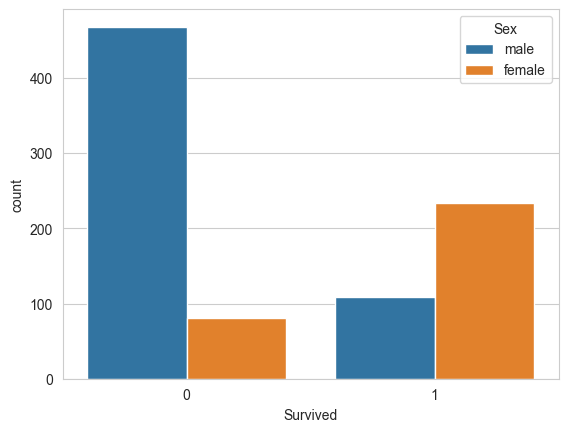

In [5]:
sn.set_style('whitegrid')
sn.countplot(x='Survived',hue='Sex',data=train)


<Axes: xlabel='Survived', ylabel='count'>

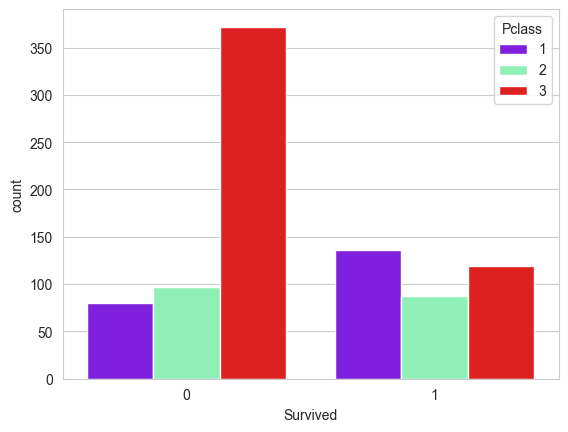

In [6]:
sn.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

In [7]:
train['Age']=train['Age'].fillna(train['Age'].mean())

<Axes: >

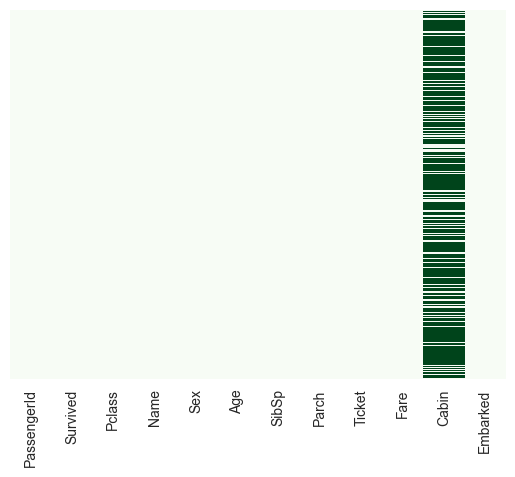

In [8]:
sn.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="Greens")

In [9]:
train.drop(['Cabin'],inplace=True,axis=1)

<Axes: >

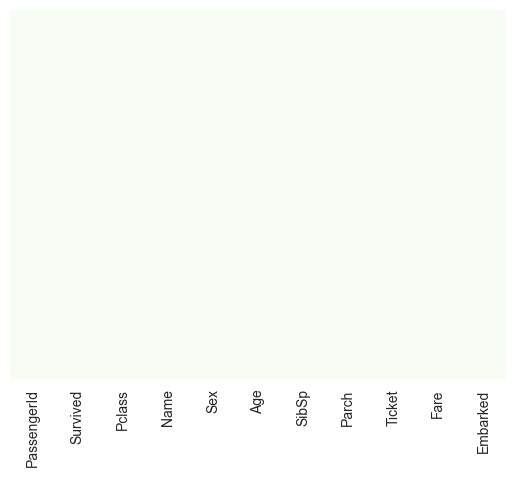

In [10]:
sn.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="Greens")

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
embarked=pd.get_dummies(train['Embarked'],drop_first=True)
sex=pd.get_dummies(train['Sex'],drop_first=True)

In [13]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [14]:
train.drop(['Embarked','Sex','Name','Ticket'],axis=1,inplace=True)

In [15]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [16]:
train=pd.concat([train,sex,embarked],axis=1)

In [17]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   male         891 non-null    bool   
 8   Q            891 non-null    bool   
 9   S            891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB


<!-- SELECTING ALGORTITHM FOR TRAINING -->

In [19]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,True,False,True
1,2,1,38.0,1,0,71.2833,False,False,False
2,3,3,26.0,0,0,7.9250,False,False,True
3,4,1,35.0,1,0,53.1000,False,False,True
4,5,3,35.0,0,0,8.0500,True,False,True


In [20]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

### SPLITING TRAINING DATA FOR TRAINING AND TESTING 

In [21]:
from sklearn.model_selection import train_test_split as ts

In [22]:
X_train,X_test,Y_train,Y_test=ts(train.drop('Survived',axis=1),train['Survived'],test_size=0.30,random_state=101)

## Training and Testing Using Different Algorithms

In [23]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [24]:
model1=LogisticRegression(solver='lbfgs', max_iter=1000)
model1.fit(X_train,Y_train)
predication=model1.predict(X_test)
accuracy=accuracy_score(Y_test,predication)
print("accuracy using LogisticRegression",accuracy*100)

accuracy using LogisticRegression 77.98507462686567


In [25]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=10)
model2.fit(X_train,Y_train)
predication=model2.predict(X_test)
accuracy=accuracy_score(Y_test,predication)
print("accuracy using RandomForestClassifier",accuracy*100)

accuracy using RandomForestClassifier 83.5820895522388


## TESTING ON UNSEEN DATA 

In [26]:
test=pd.read_csv('titanic/test2.csv')


In [27]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,True,True,False
1,893,3,47.0,1,0,7.0000,False,False,True
2,894,2,62.0,0,0,9.6875,True,True,False
3,895,3,27.0,0,0,8.6625,True,False,True
4,896,3,22.0,1,1,12.2875,False,False,True


In [28]:
test.isnull().sum()

PassengerId    0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
male           0
Q              0
S              0
dtype: int64

In [29]:
predications=model1.predict(test)
# accuracy=accuracy_score(test['Survived'],predications)
# print("accuracy on testing model2 ",accuracy*100)
# output = pd.DataFrame({'PassengerId': test.PassengerId, 'Survived': predications})
# output.to_csv('submission2.csv', index=False)
print("Your submission was successfully saved!")



Your submission was successfully saved!
